In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy

os.getcwd()

'/Users/ujjwal/rishav/galaxy'

In [2]:
cd galaxy-zoo-the-galaxy-challenge

/Users/ujjwal/rishav/galaxy/galaxy-zoo-the-galaxy-challenge


In [3]:
data=pd.read_csv("training_solutions_rev1.zip",compression='zip')
data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [4]:
data.shape

(61578, 38)

In [5]:
def conv_img(b):
    return f"{b}.jpg"
data['GalaxyID']=data["GalaxyID"].apply(conv_img)
data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
condition=[data['Class1.1']>=0.79,data['Class1.2']>=0.79]
choice=['Eliptical','Spiral']
data['Class']=np.select(condition,choice,default='tie')

In [7]:
data[data["Class"]=='Spiral'].count()
data=data[data["Class"]!="tie"]

In [8]:
data

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,Class
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Eliptical
8,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,Spiral
14,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848,Spiral
16,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.000000,0.007855,0.008768,0.000000,0.000000,0.000000,0.000000,0.000000,0.016623,Spiral
19,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61565,999786.jpg,0.800415,0.165614,0.033971,0.000000,0.165614,0.044163,0.121451,0.089182,0.076432,...,0.044591,0.044591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089182,Eliptical
61566,999795.jpg,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,Spiral
61568,999875.jpg,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,Spiral
61574,999950.jpg,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Eliptical


In [9]:
data_e=data[data["Class"]=="Eliptical"]
data_s=data[data["Class"]=="Spiral"]
data_e=data_e.sample(n=8000)
data_s=data_s.sample(n=8000)
f=pd.concat([data_e,data_s])
final_df=f[["GalaxyID","Class"]]
final_df=final_df.sample(frac=1)
final_df

,GalaxyID,Class
9560,242214.jpg,Eliptical
4933,173439.jpg,Spiral
40489,689765.jpg,Spiral
6342,193764.jpg,Eliptical
16137,338533.jpg,Eliptical
...,...,...
28296,515036.jpg,Spiral
15967,336242.jpg,Eliptical
14999,322059.jpg,Eliptical
21260,410222.jpg,Spiral


In [10]:
import zipfile
with zipfile.ZipFile("images_training_rev1.zip",'r') as zip_ref:
    zip_ref.extractall()

Text(0.5, 1.0, 'idk')

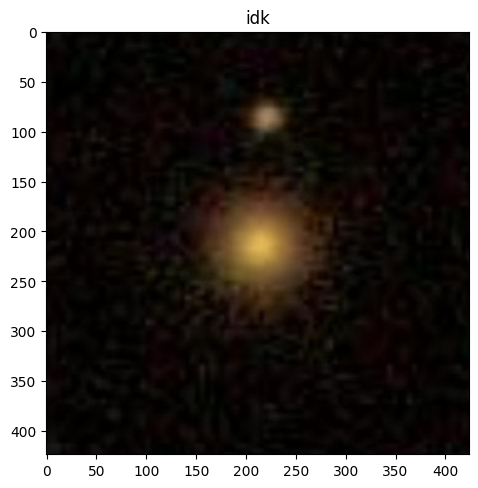

In [11]:
from tensorflow.keras.preprocessing import image
img=image.load_img("./images_training_rev1/591575.jpg")
plt.figure(figsize=(12,12.5))
plt.subplot(121)
plt.imshow(img)
plt.title("idk")

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow.keras.backend as B
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [13]:
final_df


,GalaxyID,Class
9560,242214.jpg,Eliptical
4933,173439.jpg,Spiral
40489,689765.jpg,Spiral
6342,193764.jpg,Eliptical
16137,338533.jpg,Eliptical
...,...,...
28296,515036.jpg,Spiral
15967,336242.jpg,Eliptical
14999,322059.jpg,Eliptical
21260,410222.jpg,Spiral


In [14]:
from sklearn.model_selection import train_test_split
train_datagen=ImageDataGenerator(rescale=1.0/255,
                               rotation_range=25,
                               width_shift_range=.15,
                               height_shift_range=.15,
                               horizontal_flip=True,
                               zoom_range=0.2)
valid_datagen=ImageDataGenerator(rescale=1.0/255)
train,valid=train_test_split(final_df,test_size=0.2)
valid


,GalaxyID,Class
49890,826569.jpg,Spiral
36045,626625.jpg,Spiral
50642,837638.jpg,Spiral
36078,627126.jpg,Spiral
2624,139220.jpg,Spiral
...,...,...
12919,291367.jpg,Spiral
36193,628838.jpg,Spiral
3960,159698.jpg,Spiral
59808,973781.jpg,Eliptical


In [15]:
train_generator=train_datagen.flow_from_dataframe(dataframe=train,
                                                target_size=(212,212),
                                                directory="./images_training_rev1",
                                                batch_size=32,
                                                x_col="GalaxyID",
                                                y_col='Class',
                                                color_mode='rgb',
                                                class_mode="categorical",
                                                subset="training",
                                                shuffle=True,
                                                seed=42)
valid_generator=valid_datagen.flow_from_dataframe(dataframe=valid,
                                                target_size=(212,212),
                                                directory="./images_training_rev1",
                                                batch_size=32,
                                                x_col="GalaxyID",
                                                y_col='Class',
                                                color_mode='rgb',
                                                class_mode="categorical",
                                                subset="training",
                                                shuffle=True,
                                                seed=42)


Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [16]:
# Define the Inception V3 pretrained model
from tensorflow.keras.applications import Xception
import tensorflow as tf
pretrained_model = Xception(include_top=False,weights='imagenet',input_shape=(212, 212, 3))
pretrained_model.trainable = False


83683744/83683744 [==============================] - 7s 0us/step


In [17]:

model=tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))
checkpoint=ModelCheckpoint("best_model.h5",monitor="val_loss",save_best_only="True",mode="auto")
stopping=EarlyStopping(monitor="val_loss",patience=7,verbose=1,mode="auto")


In [18]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),metrics=["accuracy"])
model

In [ ]:
history=model.fit(train_generator,epochs=10,validation_data=valid_generator,callbacks=[checkpoint,stopping])

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.8916

/Users/ujjwal/miniconda3/envs/rishav/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


400/400 [==============================] - 1993s 5s/step - loss: 0.2637 - accuracy: 0.8916 - val_loss: 0.2131 - val_accuracy: 0.9137
Epoch 2/10
400/400 [==============================] - 2211s 6s/step - loss: 0.2207 - accuracy: 0.9117 - val_loss: 0.2114 - val_accuracy: 0.9141
Epoch 3/10
400/400 [==============================] - 2087s 5s/step - loss: 0.2021 - accuracy: 0.9202 - val_loss: 0.1954 - val_accuracy: 0.9181
Epoch 4/10
299/400 [=====================>........] - ETA: 6:16 - loss: 0.2014 - accuracy: 0.9188

In [2]:
model.describe()

NameError: name 'model' is not defined